In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pylab as plt
from sklearn import preprocessing

In [2]:
data = pd.read_csv("/Users/ankushbharadwaj/Downloads/winequality-red.csv", sep=";")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [7]:
#no missing data, that's dope

In [5]:
X = data[[u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar',
          u'chlorides', u'free sulfur dioxide', u'total sulfur dioxide', u'density',
          u'density', u'pH', u'sulphates', u'alcohol']]

In [6]:
y = data.quality

In [7]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [8]:
y.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X)

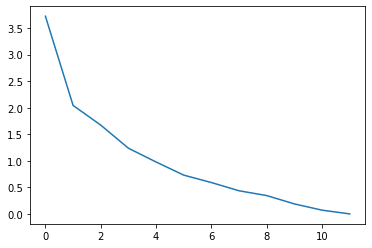

In [10]:
model = PCA()
results = model.fit(X) #applies PCA on predictors
Z = results.transform(X) #turns result into array
plt.plot(results.explained_variance_) #plots expplained variane in variables
plt.show()

In [11]:
def sum_array(n):
    lst = []
    i = 0
    sum_ = 0
    while i < len(n):
        sum_ = sum_ + n[i]*10
        if sum_ > 100:
            lst.append(100)
        else:
            lst.append(sum_)
        i = i + 1
    return lst  

In [12]:
cum_variation_explained = sum_array(results.explained_variance_)
PCA_findings_data = {"# of variables":["1","2","3","4","5","6","7","8","9","10","11","12"], 
                     "% variance explained":cum_variation_explained}
PCA_findings_df = pd.DataFrame(PCA_findings_data)
PCA_findings_df

,# of variables,% variance explained
0,1,37.209404
1,2,57.631909
2,3,74.348607
3,4,86.714604
4,5,96.486937
5,6,100.000000
6,7,100.000000
7,8,100.000000
8,9,100.000000
9,10,100.000000


In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB()

[761]
[761, 875]
[761, 875, 898]
[761, 875, 898, 888]
[761, 875, 898, 888, 911]
[761, 875, 898, 888, 911, 917]
[761, 875, 898, 888, 911, 917, 929]
[761, 875, 898, 888, 911, 917, 929, 931]
[761, 875, 898, 888, 911, 917, 929, 931, 929]


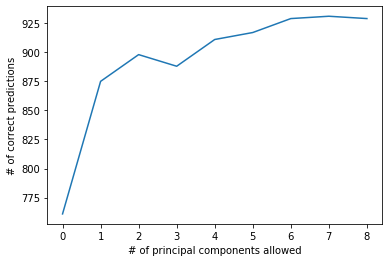

In [14]:
predicted_correct = [] #array filled with correctly predicted observations
for i in range(1,10): #loop
    model = PCA(n_components = i) 
    results = model.fit(X) #fit model on features
    Z = results.transform(X) #Z in matrix form
    fit = gnb.fit(Z,y)
    pred = fit.predict(Z)
    predicted_correct.append(confusion_matrix(pred,y).trace())
    print(predicted_correct)
plt.plot(predicted_correct,)
plt.xlabel("# of principal components allowed")
plt.ylabel("# of correct predictions")
plt.show()

In [15]:
#let's go with 6 principal components
from sklearn.model_selection import train_test_split
validation_size = .177
seed = 7
Y = y.as_matrix()
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size, random_state=seed)
model = PCA(n_components = 6) 
results = model.fit(X_train) #fit model on features
Z = results.transform(X_train) #Z in matrix form
fit = gnb.fit(X_train,Y_train)
pred = fit.predict(X_validation)

/Users/ankushbharadwaj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [16]:
confusion_matrix(Y_validation,pred)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  1,  1,  0],
       [ 1,  5, 72, 26,  4,  0],
       [ 0,  3, 37, 64, 26,  5],
       [ 0,  0,  1, 12, 17,  1],
       [ 0,  0,  0,  0,  3,  0]])

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [18]:
accuracy_score(Y_validation,pred)

0.5387323943661971

In [19]:
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.5387323943661971
[[ 0  0  0  0  0  0]
 [ 0  0  5  1  1  0]
 [ 1  5 72 26  4  0]
 [ 0  3 37 64 26  5]
 [ 0  0  1 12 17  1]
 [ 0  0  0  0  3  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         7
           5       0.63      0.67      0.65       108
           6       0.62      0.47      0.54       135
           7       0.33      0.55      0.41        31
           8       0.00      0.00      0.00         3

    accuracy                           0.54       284
   macro avg       0.26      0.28      0.27       284
weighted avg       0.57      0.54      0.55       284



/Users/ankushbharadwaj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
